# **Exploratory Data Analysis and Data Preprocessing**

In this notebook, the dataset available in the google sheets is visualised using some EDA techniques and suitable conclusions are drawn from the same. Then basic text preprocessing is done along with resampling of the imbalanced dataset. Finally, the balanced and unbalanced datasets are saved as a csv file for later use. In the first part of the notebook, Exploratory Data Analysis is done which is followed by Data Cleaning and PreProcessing.

### ***PART 1) Exploratory Data Analysis***
* Distribution of products across the brands
* Product Category Distribution
* Product Description Text Length Analysis
* Overall Word Cloud and Word Cloud for each Category's Product Description 
 


## **Importing the required libraries**

In [1]:
#importing the libraries for matrix and dataframe handling, plotting, etc 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#miscellaneous libraries used
import re
import itertools
from collections import Counter
from sys import maxsize
import math
import warnings
warnings.filterwarnings("ignore")

#importing the NLP and Data Visualisation related libraries
import string
from string import ascii_letters, punctuation, digits
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/rakesh8/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/rakesh8/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/rakesh8/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/rakesh8/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/rakesh8/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package avera

ModuleNotFoundError: No module named 'textblob'

In [3]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

## **Reading the Data:** 
The e-commerce product dataset (train_product_data.csv) that was given in a Google Sheet was first downloaded as a csv file. This dataset is the one to be visualised and preprocessed and is read using the Pandas library.

In [4]:
products = pd.read_csv("train_product_data.csv")
products.head(15)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."
5,4044c0ac52c1ee4b28777417651faf42,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVUHAAVH9X,1199.0,479.0,"[""http://img5a.flixcart.com/image/short/5/z/c/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
6,e54bc0a7c3429da2ebef0b30331fe3d2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/ladela-bellies/p/itmeh...,Ladela Bellies,Footwear,SHOEH4KM2W3Z6EH5,1724.0,950.0,"[""http://img5a.flixcart.com/image/shoe/s/g/m/b...",False,Key Features of Ladela Bellies Brand: LADELA C...,5,5,Ladela,"{""product_specification""=>[{""key""=>""Occasion"",..."
7,c73e78fb440ff8972e0762daed4fc109,2016-03-25 22:59:23 +0000,http://www.flipkart.com/carrel-printed-women-s...,Carrel Printed Women's,Clothing,SWIEHF3EF5PZAZUY,2299.0,910.0,"[""http://img6a.flixcart.com/image/swimsuit/5/v...",False,Key Features of Carrel Printed Women's Fabric:...,No rating available,No rating available,Carrel,"{""product_specification""=>[{""key""=>""Neck"", ""va..."
8,9aacdecceb404c74abddc513fd2756a8,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FGBDJGX8FW,999.0,379.0,"[""http://img6a.flixcart.com/image/short/q/z/v/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
9,83c53f8948f508f51d2249b489ca8e7d,2016-03-25 22:59:23 +0000,http://www.flipkart.com/freelance-vacuum-bottl...,Freelance Vacuum Bottles 350 ml Bottle,Pens & Stationery,BOTEGYTZ2T6WUJMM,699.0,699.0,"[""http://img5a.flixcart.com/image/bottle/j/m/m...",False,Specifications of Fr

##### From below, we can see that our dataset consists of 15k datapoints with each having approximately 15 columns. 

In [5]:
products.shape

(14999, 15)

A summary of the dataframe is shown below:

In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  14999 non-null  object 
 1   crawl_timestamp          14999 non-null  object 
 2   product_url              14999 non-null  object 
 3   product_name             14999 non-null  object 
 4   product_category_tree    14999 non-null  object 
 5   pid                      14999 non-null  object 
 6   retail_price             14942 non-null  float64
 7   discounted_price         14942 non-null  float64
 8   image                    14996 non-null  object 
 9   is_FK_Advantage_product  14999 non-null  bool   
 10  description              14998 non-null  object 
 11  product_rating           14999 non-null  object 
 12  overall_rating           14999 non-null  object 
 13  brand                    10289 non-null  object 
 14  product_specifications

## **Dropping the NaN's and duplicate Product Descriptions**

Information about the NaN values over the entire dataset is given below.

In [7]:
print(products.isna().sum())

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 57
discounted_price             57
image                         3
is_FK_Advantage_product       0
description                   1
product_rating                0
overall_rating                0
brand                      4710
product_specifications        6
dtype: int64


The Seaborn heatmap below helps us in visualising the 'NaN' values in the entire dataset. It can be clearly observed that the columns, 'brand', 'retail_price' and 'discounted_price' have a significant amount of NaN values. As these columns do not have much contribution in helping us predict the category of a product, these 'NaN' datapoints are not dropped from the dataset.

<Axes: >

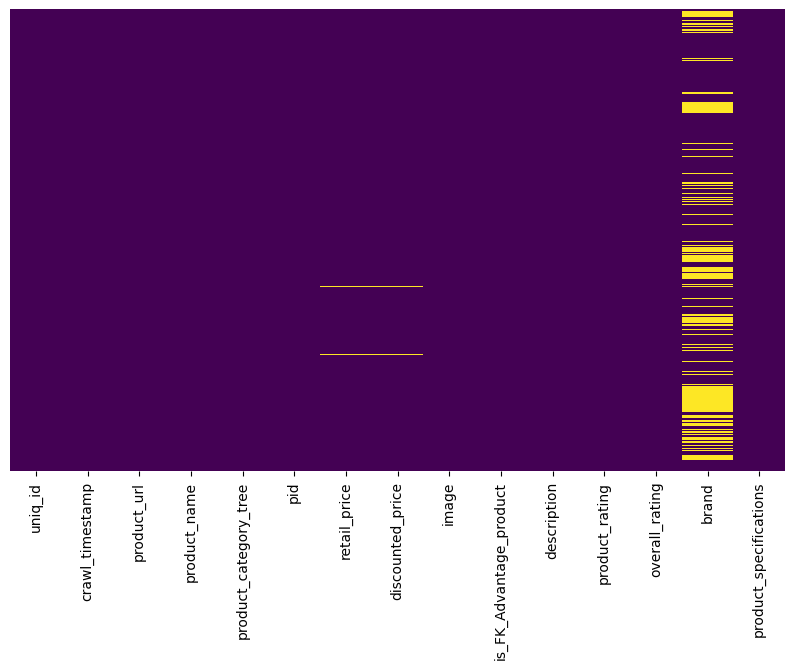

In [8]:
#heatmap showing the distribution of all the Nan's throughout the data
plt.figure(figsize=(10,6))
sns.heatmap(products.isnull(), cbar=False, yticklabels=False, cmap = 'viridis')


As we have to predict the category that a particular product belongs to, from the given dataset, only **description** column gives us useful details according to which we can predict its category. Hence, the datapoints having **description** or **product_category_tree** points as NaN cannot be included in our dataset and therefore, they are removed. Also, datapoints having duplicate descriptions are removed as well.

In [9]:
#keeping only those datapoints whose description is not NaN
products = products[products['description'].notna()]
#keeping only those datapoints product_category_tree is not NaN
products = products[products['product_category_tree'].notna()]
#dropping the datapoints with duplicate descriptions
products = products.drop_duplicates("description",keep='first', inplace=False, ignore_index=True)
products = products.reset_index(drop=True)
products

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13158,16de377e88660863bc028949aedb8557,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-book-cove...,Thelostpuppy Book Cover for Apple iPad Air 2,Mobiles & Accessories,ACCEA4DZW4GZ3J6Q,2199.0,599.0,"[""http://img6a.flixcart.com/image/cases-covers...",False,Thelostpuppy Book Cover for Apple iPad Air 2 (...,No rating available,No rating available,Thelostpuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
13159,9402d23592adc0795e1ca71a661c9a5f,2015-12-20 08:26:17 +0000,http://www.flipkart.com/babes-brass-cuff/p/itm...,Babes Brass Cuff,Jewellery,BBAEAEZ2EYWXWGZS,999.0,749.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Babes Brass Cuff (Pack of 2)\n ...,No rating available,No rating available,Babes,"{""product_specification""=>[{""key""=>""Collection..."
13160,87bcdd46bb48bfc1045d7ee84aef7b7a,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kenway-retail-brass-co...,Kenway Retail Brass Copper Cuff,Jewellery,BBAEA49HNDNQYGJU,529.0,295.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Kenway Retail Brass Copper Cuff\n ...,No rating available,No rating available,Kenway Retail,"{""product_specification""=>[{""key""=>""Collection..."
13161,1336909e5468b63c9b1281350eba647d,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kenway-retail-brass-co...,Kenway Retail Brass Copper Cuff,Jewellery,BBAEA49HHKJTPHWV,547.0,322.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Kenway Retail Brass Copper Cuff\n ...,No rating available,No rating available,Kenway Retail,"{""product_specification""=>[{""key""=>""Collection..."


## **Dropping the unnecessary columns**

As mentioned earlier, only **description** and **product_category_tree** are of utmost importance in predicting the category of a product, the rest of the columns which do not contribute any meaning to our problem statement are removed. However, some columns like **product_name** and **brand** are still kept for further visualisation of the data.

In [10]:
#list of all the columns in the dataset
print(products.columns.tolist())

['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'product_category_tree', 'pid', 'retail_price', 'discounted_price', 'image', 'is_FK_Advantage_product', 'description', 'product_rating', 'overall_rating', 'brand', 'product_specifications']


In [11]:
#dropping the columns which do not add much meaning to our problem statement
products = products.drop(['uniq_id',
               'crawl_timestamp', 
               'product_url', 
               'pid', 
               'retail_price', 
               'discounted_price',
               'image',
               'product_rating',
               'overall_rating',
               'is_FK_Advantage_product',
               'product_specifications'], axis = 1)

In [12]:
products.head()

,product_name,product_category_tree,description,brand
0,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha
1,AW Bellies,Footwear,Key Features of AW Bellies Sandals Wedges Heel...,AW
2,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha
3,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha
4,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,"Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar


## **Lineplot of Products of a specific Brand**

The below lineplot helps us visualise the frequency of all the products of a particular brand that is available.

In [13]:
#Creating a temporary Dataframe 
temp_df = products.copy(deep=True)

# Delete the rows and having brand as NaN values 
temp_df = temp_df[temp_df['brand'].notna()]
temp_df

,product_name,product_category_tree,description,brand
0,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha
1,AW Bellies,Footwear,Key Features of AW Bellies Sandals Wedges Heel...,AW
2,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha
3,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha
4,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,"Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar
...,...,...,...,...
13158,Thelostpuppy Book Cover for Apple iPad Air 2,Mobiles & Accessories,Thelostpuppy Book Cover for Apple iPad Air 2 (...,Thelostpuppy
13159,Babes Brass Cuff,Jewellery,Babes Brass Cuff (Pack of 2)\n ...,Babes
13160,Kenway Retail Brass Copper Cuff,Jewellery,Kenway Retail Brass Copper Cuff\n ...,Kenway Retail
13161,Kenway Retail Brass Copper Cuff,Jewellery,Kenway Retail Brass Copper Cuff\n ...,Kenway Retail


In [14]:
temp_df.shape

(9005, 4)

In [15]:
#creating a list of all the unique brand names
brands_df = list(dict.fromkeys(list(temp_df.loc[:, 'brand'].values)))

brand_keys = [] #corresponds to the unique brand names
brand_freq = [] #corresponds to the count of the product for a brand

for brand in brands_df:
  #getting the count for that brand
  count = np.sum(temp_df.loc[:, 'brand'].values == brand)
  if count>=10:
    brand_keys.append(brand)
    brand_freq.append(count)

In [137]:
max_count = max(brand_freq)
idx = brand_freq.index(max_count)
print("The brand having maximum amount of products on E Commerce is {} with {} many products".format(brand_keys[idx],max_count))

The brand having maximum amount of products on E Commerce is Allure Auto with 469 many products


From the lineplot below, we can see that most of the brands have less than 100 of their products while some brands have around 300 of their products. 

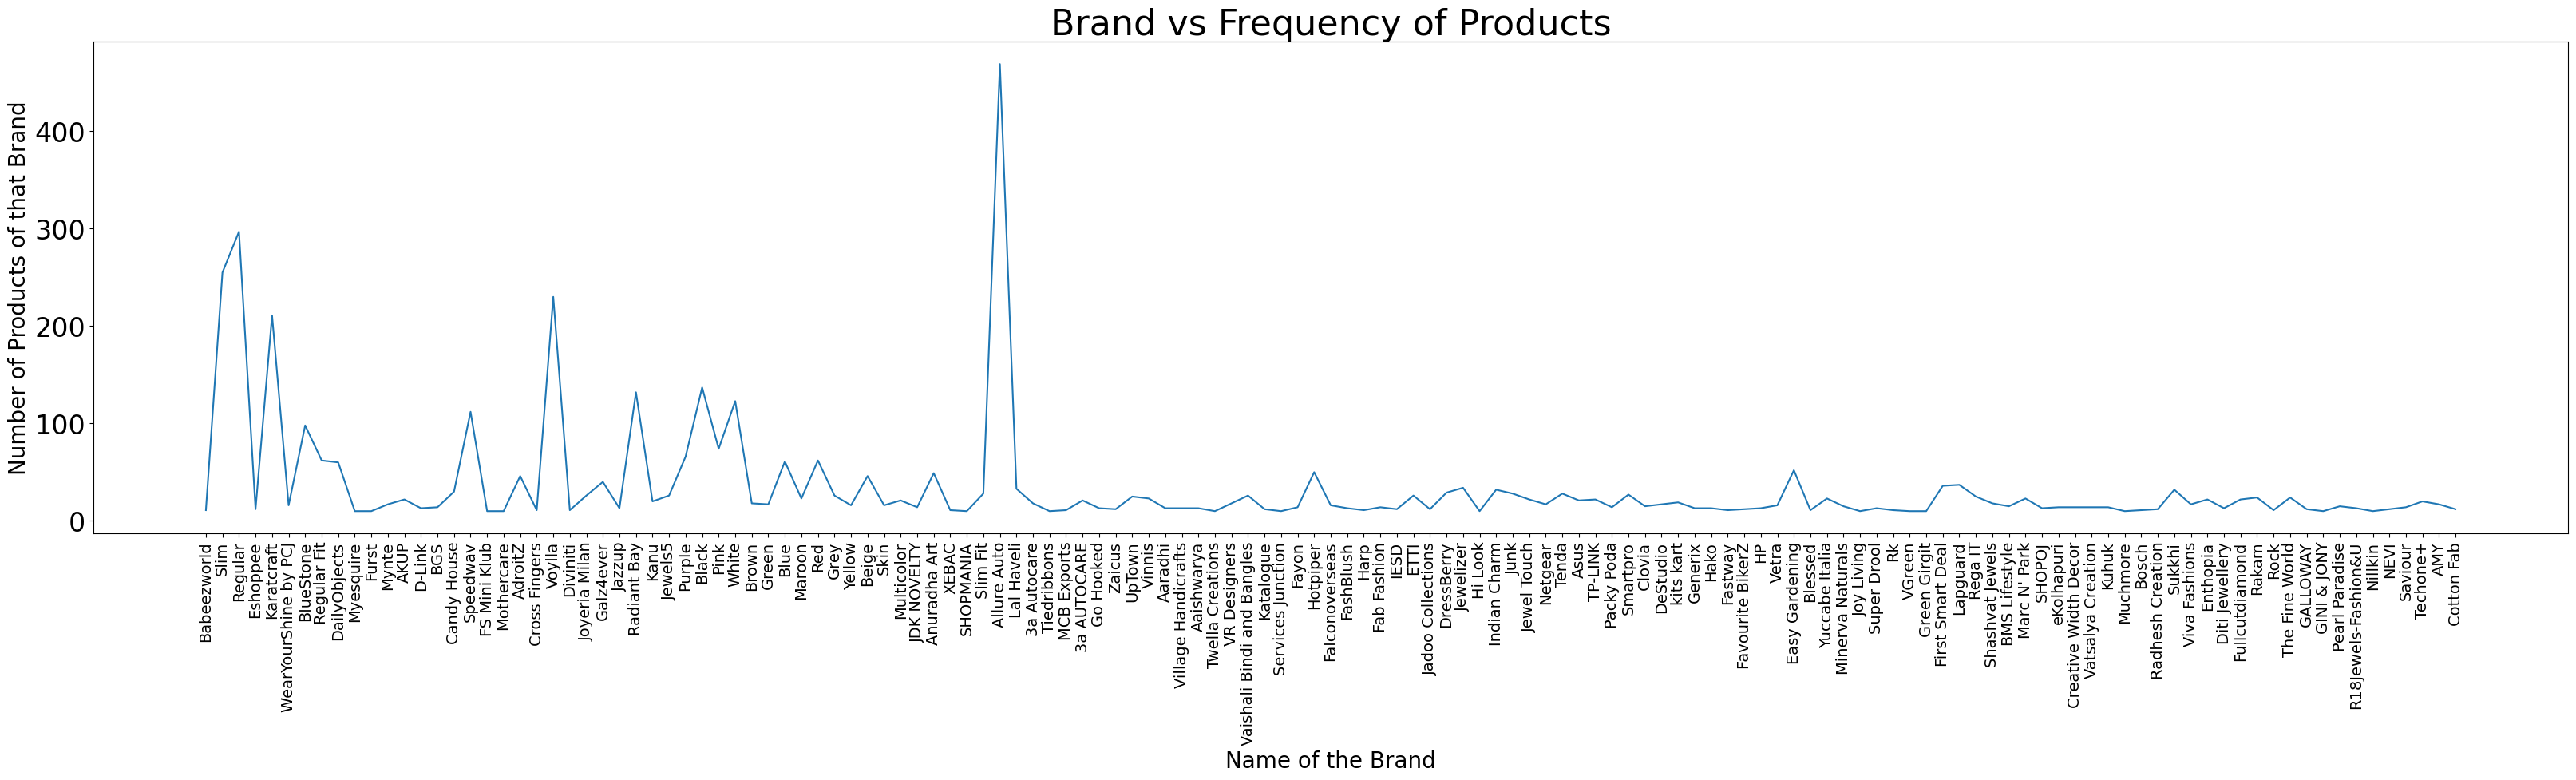

In [17]:
plt.figure(figsize=(40,8))
plt.title("Brand vs Frequency of Products", fontsize=32)
plt.ylabel("Number of Products of that Brand", fontsize=20)
plt.xlabel("Name of the Brand", fontsize=20)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=24)
sns.lineplot(x=brand_keys, y=brand_freq)
plt.show()

## **Bar Graph of the most common words in Product Description**

A bar graph of the 40 most frequent words occuring in the Product Description is made. This has helped us in adding some words to our stopwords list like shipping, delivery, flipkart, etc (which are then removed) as they do not have much meaning/contribution in the prediction of product category.

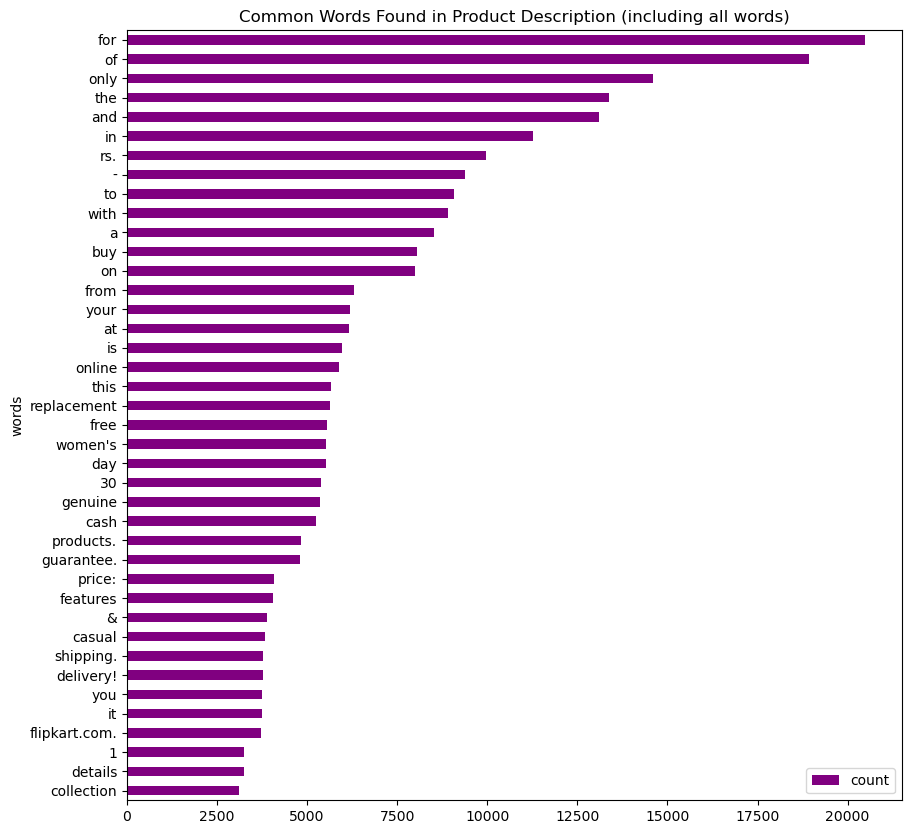

In [18]:
def most_frequent_words(description):

  for i in range(len(description)):
    description[i] = description[i].lower().split()

  all_words = list(itertools.chain(*description))
  word_counts = Counter(all_words)

  #creating a pandas dataframe of the 40 most common words in the dataset
  clean_description = pd.DataFrame(word_counts.most_common(40),
                                    columns=['words', 'count'])

  return clean_description

description = products["description"].tolist()
most_common_description = most_frequent_words(description)

fig, ax = plt.subplots(figsize=(10, 10))
# plotting the bargraph in decreasing sorted order
most_common_description.sort_values(by='count').plot.barh(x='words',
                                                          y='count',
                                                          ax=ax,
                                                          color="purple")

ax.set_title("Common Words Found in Product Description (including all words)")
plt.show()

## **Count of the different Product Categories**

Through the code snippet below, we are analyzing the different Product Categories and if they have more than 10 products, we are printing them as shown below.

In [29]:
# Get the frequency count of each category
print(products['product_category_tree'].value_counts())

product_category_tree
Clothing                       4663
Jewellery                      2658
Footwear                        988
Automotive                      935
Home Decor & Festive Needs      606
Kitchen & Dining                606
Computers                       529
Watches                         526
Mobiles & Accessories           501
Tools & Hardware                321
Toys & School Supplies          260
Pens & Stationery               223
Baby Care                       195
Bags, Wallets & Belts           152
Name: count, dtype: int64


## **Combining the redundant categories**

From the above bargraph, we can see that there are some classes which can be grouped together like **Bags, Wallets & Belts** and **Watches** and **Toys & School Supplies** and **home&Pens & Stationery**. This will also help us in increasing the datapoints for each category in order to train a better model.  

In [31]:
products['product_category_tree'].unique()

array(['Clothing ', 'Footwear ', 'Pens & Stationery ',
       'Bags, Wallets & Belts ', 'Home Decor & Festive Needs ',
       'Automotive ', 'Tools & Hardware ', 'Baby Care ',
       'Mobiles & Accessories ', 'Watches ', 'Toys & School Supplies ',
       'Jewellery ', 'Kitchen & Dining ', 'Computers '], dtype=object)

In [41]:
primary_category = products["product_category_tree"].tolist()
#lowercasing the categories to prevent duplicate categories and removal of blank spaces, etc
for i in range(len(primary_category)):
  primary_category[i] = primary_category[i].lower()
  primary_category[i] = primary_category[i].replace(" ","")
  primary_category[i] = primary_category[i]


In [45]:
revised_categories = [None]*len(primary_category)

for i in range(len(primary_category)):
  if primary_category[i]=="homedecor&festiveneeds" or primary_category[i]=="kitchen&dining":
    revised_categories[i] = 'Home Decor & Dining'
  elif primary_category[i]=='pens&stationery'or primary_category[i]=="toys&schoolsupplies"or primary_category[i]=="babycare":
    revised_categories[i] = 'toys & schoolsupplies & Baby care'
  elif primary_category[i]=='tools&hardware' or primary_category[i]=='watches' or primary_category[i]=='computers' or primary_category[i]=="mobiles&accessories":
    revised_categories[i]='electronics'
  elif primary_category[i]=='bags,wallets&belts' or primary_category[i]=='watches' or primary_category[i]=='jewellery':
    revised_categories[i]='Jewellery & accessories'
  else:
    revised_categories[i] = primary_category[i]

print("The length of the revised grouped categories are {}".format(len(Counter(revised_categories))))


The length of the revised grouped categories are 7


In [47]:
#creating a new column in the dataframe which stores these revised grouped categories
products["primary_categories"] = revised_categories
products.head(20)

,product_name,product_category_tree,description,brand,primary_categories
0,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing
1,AW Bellies,Footwear,Key Features of AW Bellies Sandals Wedges Heel...,AW,footwear
2,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing
3,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing
4,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,"Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,footwear
5,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing
6,Ladela Bellies,Footwear,Key Features of Ladela Bellies Brand: LADELA C...,Ladela,footwear
7,Carrel Printed Women's,Clothing,Key Features of Carrel Printed Women's Fabric:...,Carrel,clothing
8,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing
9,Freelance Vacuum Bottles 350 ml Bottle,Pens & Stationery,Specifications of Freelance Vacuum Bottles 350...,Freelance,toys & schoolsupplies & Baby care


## **Frequency Plot of the revised categories**

The Bargraph shown below shows the frequency of the product in each of the final classes. These are also the classes into which the final Product Categorization is done. We can see that this dataset is heavily imbalanced with **clothing** category dominating the other categories by more than 50%.

In [52]:
# Get the frequency count of each category
category_count = products['primary_categories'].value_counts()

print(category_count)

primary_categories
clothing                             4663
Jewellery & accessories              2810
electronics                          1877
Home Decor & Dining                  1212
footwear                              988
automotive                            935
toys & schoolsupplies & Baby care     678
Name: count, dtype: int64


<Axes: title={'center': 'Product Category Distribution'}, xlabel='primary_categories'>

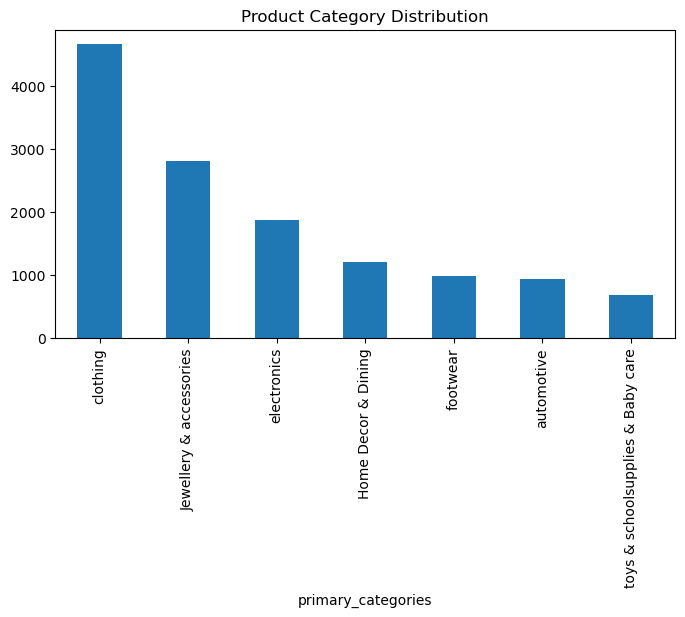

In [53]:
fig, ax = plt.subplots(figsize=[8,4], nrows=1, ncols=1)
category_count.plot(ax=ax, kind='bar', title='Product Category Distribution')

## **Text Length Analysis**

Analysis of the length of the Product Description is done to help us get an idea about the minimum, maximum and average length of the same. This is done in order to decide whether we have to discard some datapoints having text length less than or greater to a threshold.

In [56]:
#finding the length of the description
max_desc_len = -1
desc_len_sum = 0
min_desc_len = maxsize

product_description = products["description"].tolist()

for i in range(len(product_description)):
  try:
    max_desc_len = max(max_desc_len,len(product_description[i]))
    min_desc_len = min(min_desc_len,len(product_description[i]))
    desc_len_sum+=len(product_description[i])
  except:
    pass

print("Max description length is {}.".format(max_desc_len))
print("Min description length is {}.".format(min_desc_len))
print("Average description length is {}.".format(desc_len_sum/len(product_description)))

Max description length is 5309.
Min description length is 74.
Average description length is 410.81508774595454.


## **Word Clouds**

**Word cloud consisting of the most frequent words in the Product Description**

This wordcloud shows the 200 most common words in the raw dataset that was provided. This wordcloud helped a lot to get an idea about removing words such as **[shipping, genuine, cash, product, delivery, flipkart, rs, etc]** as these words are common to the context of all the categories and will not contribute much to predicting the category of a particular product.

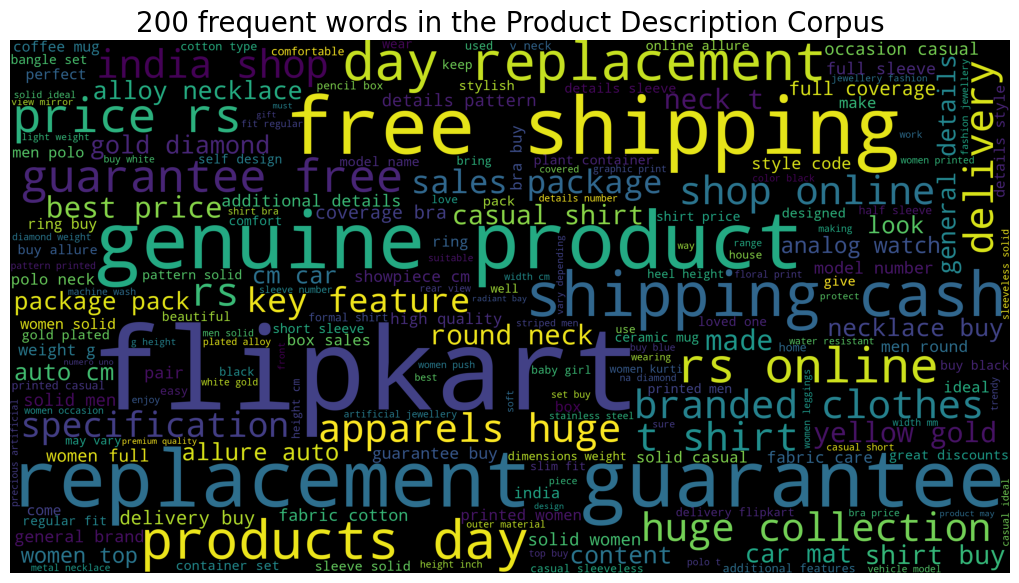

In [60]:
product_content = ""

for i in products["description"]: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    product_content += " ".join(separate)+" "

stop_words = set(STOPWORDS)
final_wordcloud = WordCloud(width = 3000, height = 1600, 
                            max_words=200,
                            background_color ='black', 
                            stopwords = stop_words, 
                            min_font_size = 10).generate(product_content)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.title("200 frequent words in the Product Description Corpus", fontsize=20)
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### ***PART 2) Data Cleaning and Pre Processing***

**Character Contraction**

Character contraction is done to look at what percentage of the dataset is in English Characters. Punctuations, numbers, hyperlinks, etc will all be removed during further cleaning of the dataset.

During this analysis of the characters, we can see that there are several emoticons, letters from different languages (Chinese), etc that can be seen. These are then removed from the corpus.

In [62]:
corpus = ' '.join(products['description']).lower()
characters = Counter(corpus)
sorted(characters.items(), key=lambda i: i[1], reverse=True)

total=0
for i in ascii_letters+punctuation+digits:
  total+=characters[i]

print("The % of data consisting of only English Characters is {}.".format(100*total/len(' '.join(products['description']))))
print("\n")
print(characters)

The % of data consisting of only English Characters is 82.31818239676973.


Counter({' ': 922665, 'e': 458959, 'a': 343552, 'o': 320427, 'r': 297788, 't': 296895, 'i': 295022, 'n': 277981, 's': 262981, 'l': 240015, 'c': 181297, 'd': 150094, 'h': 131481, 'p': 129756, 'u': 124718, 'f': 112449, 'm': 107452, 'y': 98683, 'g': 95381, 'b': 76441, '.': 70178, 'w': 58573, 'k': 50006, 'v': 38268, ',': 27085, '0': 22367, '-': 19879, '1': 19577, '\t': 18598, '9': 16968, '\n': 14980, '3': 14055, ':': 12381, '2': 11993, "'": 11228, '5': 10584, '4': 9198, 'x': 9046, 'j': 7046, 'z': 6383, '8': 6156, '6': 5461, '!': 5051, '7': 4801, ')': 4604, 'q': 4492, '(': 4413, '&': 3977, '/': 2784, '"': 1250, '%': 738, '_': 694, '\r': 520, '\xa0': 466, '*': 385, '?': 313, ';': 307, '’': 307, '•': 258, '|': 218, '+': 167, 'é': 115, '”': 103, '=': 100, '“': 76, '@': 64, '–': 53, '#': 49, '�': 48, 'â': 39, '¢': 31, '\x80': 21, '°': 19, '…': 18, 'ã': 18, '®': 16, '✔': 15, '‚': 12, '±': 11, '\u2028': 10, '~': 8, '¬': 8

In [63]:
# getting all the words ending an apostrophe and single letter
contractions = Counter(re.findall("[a-z]+'[a-z]+", corpus))
apostrophe_end = sorted(contractions.items(), key=lambda i: i[1], reverse=True)
print("\n")
print(apostrophe_end)

# getting all the words starting with a single letter and an apostrophe
contractions=Counter(re.findall("[a-z]'[a-z]+", corpus))
apostrophe_start = sorted(contractions.items(), key=lambda i: i[1], reverse=True)
print("\n")
print(apostrophe_start)

#getting all the URLS
urls = re.findall('\(*http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))*', corpus)
print("\n")
print(urls)



[("women's", 5572), ("men's", 2705), ("girl's", 841), ("boy's", 524), ("don't", 131), ("you're", 114), ("it's", 69), ("doesn't", 40), ("nod'r", 33), ("customer's", 32), ("bra's", 30), ("you'll", 27), ("d'clair", 26), ("won't", 25), ("they're", 24), ("adapter's", 24), ("laptop's", 24), ("monitor's", 19), ("manufacturer's", 18), ("woman's", 17), ("today's", 16), ("bras's", 16), ("india's", 14), ("dede's", 13), ("phone's", 12), ("car's", 12), ("product's", 10), ("model's", 9), ("can't", 9), ("scheffer's", 9), ("what's", 8), ("wellworth's", 8), ("kid's", 8), ("company's", 8), ("computer's", 8), ("you'd", 7), ("vehicle's", 7), ("finger's", 7), ("seema's", 7), ("viewer's", 7), ("buyer's", 7), ("man's", 6), ("shirt's", 6), ("i'm", 6), ("chef'n", 6), ("kb's", 6), ("baby's", 6), ("l'appel", 6), ("l'elegantae", 6), ("lord's", 6), ("cat's", 5), ("vala's", 5), ("ona's", 5), ("one's", 5), ("asia's", 5), ("ruhi's", 5), ("lil'posh", 5), ("d'signer", 4), ("item's", 4), ("khadim's", 4), ("aren't", 4)

In [64]:
custom_contracts = {
    "women's" : "women",
    "men's" : "men",
    "girl's" : "girl",
    "boy's" : "boy",
    "don't" : "do not",
    "product's" : "product",
    "it's" : "its",
    "bra's" : "bras",
    "won't": "will not",
    "doesn't" : "does not",
    "l's" : " ",
    "n's" : " ",
    "y's" : " ",
    "n't" : "not",
    "r's" : "rs",
    "u're" : "your",
    "a's" : " ",
    "e's": " "
}

custom_stopwords = [w for w in set(stopwords.words("english"))]
custom_stopwords += list(punctuation)
stopwords_dataset = ["replacement","shipping","delivery","cash", "rs", "flipkart", "genuine", "details", "guarantee","free", "genuine", "flipkart.com"]
custom_stopwords.extend(stopwords_dataset)
wordnet_lemmatizer = WordNetLemmatizer()

In the following code snippet, the following things have been taken care of:

* Lowercasing
* Custom Contraction Mapping
* Keeping only the ascii characters in the corpus
* Removal of URLs/ Hyperlinks
* Removal of numbers and punctuations
* Custom Stopword Removal 
* Lemmatization
* Removal of extra whitespaces


In [65]:
def clean(text):

  for i in range(len(text)):
    text[i] = text[i].lower()
    text[i] = text[i].replace("\n"," ")
    for keys,values in custom_contracts.items():
      text[i] = text[i].replace(keys,values)
    text[i] = re.sub("[a-z]'[a-z]+", " ", text[i])
    #removing the extra whitespaces
    text[i] = re.sub(' +', ' ', text[i])
    #keeping only the ascii characters -> handles emoticons, letters from other languages, etc
    text[i] = re.sub(r'[^\x00-\x7F]+',' ', text[i])
    #removing the urls
    text[i] = re.sub('[(]?http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F])/)*', ' ', text[i])
    text[i] = ''.join([j for j in text[i] if not j.isdigit()])
    text[i] = text[i].split()
    text[i] = ' '.join([word for word in text[i] if word not in custom_stopwords])
    #removing the punctuations
    text[i] = re.sub(r'[^\w\s]', '', text[i])
    #lemmatization
    text[i] = [wordnet_lemmatizer.lemmatize(w) for w in word_tokenize(text[i])]
    #removing the words which have a length less than 3
    text[i] = [word for word in text[i] if len(word)>=3]
  
  return text

raw_description = products["description"].tolist()
cleaned_description = clean(raw_description)
print(cleaned_description[:5])

[['key', 'feature', 'alisha', 'solid', 'woman', 'cycling', 'short', 'cotton', 'lycra', 'navy', 'red', 'navyspecifications', 'alisha', 'solid', 'woman', 'cycling', 'short', 'short', 'number', 'content', 'sale', 'package', 'pack', 'fabric', 'cotton', 'lycra', 'type', 'cycling', 'short', 'general', 'pattern', 'solid', 'ideal', 'woman', 'fabric', 'care', 'gentle', 'machine', 'wash', 'lukewarm', 'water', 'bleach', 'additional', 'style', 'code', 'altht_p_', 'box', 'short'], ['key', 'feature', 'belly', 'sandal', 'wedge', 'heel', 'casualsaw', 'belly', 'price', 'material', 'synthetic', 'lifestyle', 'casual', 'heel', 'type', 'wedge', 'warranty', 'type', 'manufacturer', 'product', 'warranty', 'manufacturing', 'defect', 'day', 'care', 'instruction', 'allow', 'pair', 'shoe', 'air', 'deodorize', 'regular', 'basis', 'use', 'shoe', 'bag', 'prevent', 'stain', 'mildew', 'dust', 'dry', 'dirt', 'surface', 'using', 'clean', 'cloth', 'use', 'polish', 'shinerspecifications', 'belly', 'general', 'ideal', 'wom

## **Visualisation of the cleaned Dataset**

**Visualisation of the most common words**

40 most common words are plotted in the form of a bargraph after removal of the unnecessary data. From the bargraph, we can clearly see that these are the words which actually can help us in identifying the particular category of a product.

<Axes: title={'center': '40 Most Common Words relevant to Dataset'}, xlabel='Frequency', ylabel='Words'>

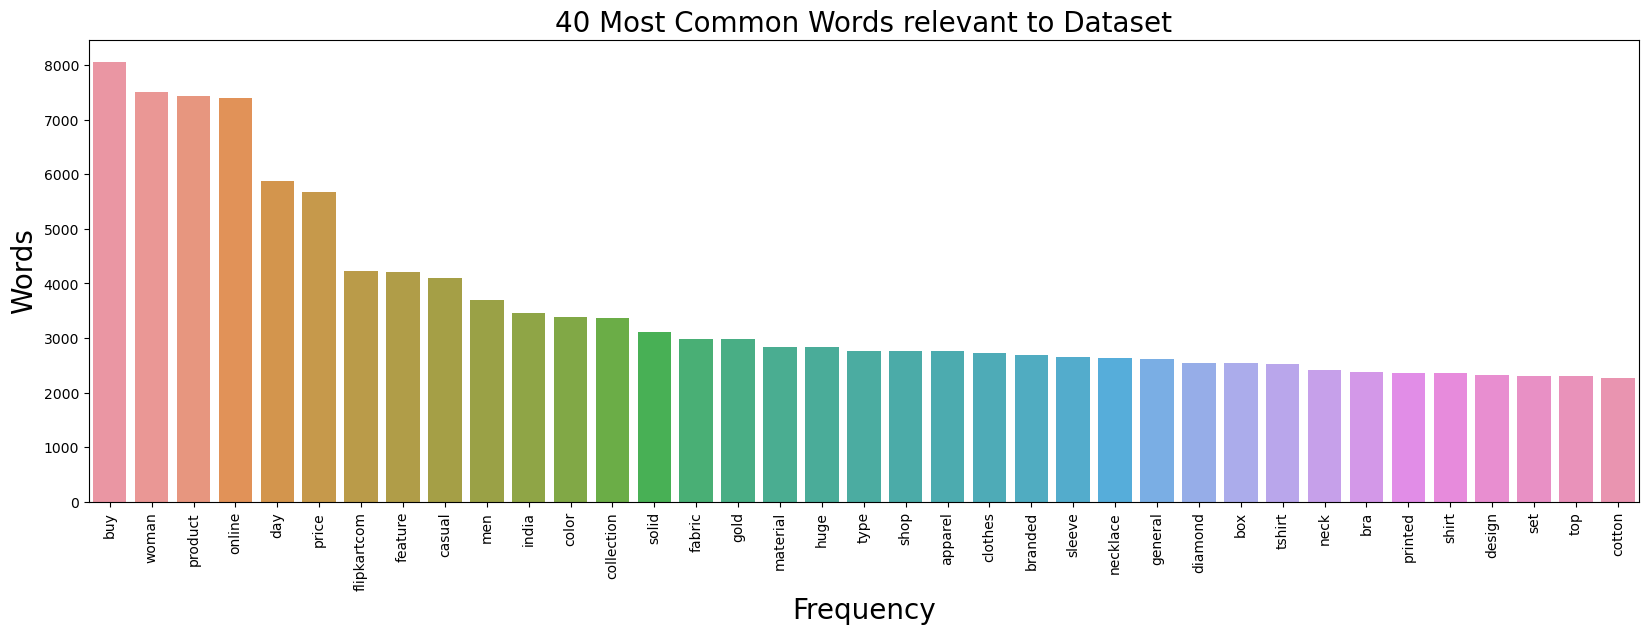

In [66]:
corpus = []
for text in cleaned_description:
  for word in text:
    corpus.append(word)

counter = Counter(corpus)
most=counter.most_common()
x, y = [], []
for word,count in most[:40]:
  if (word not in custom_stopwords):
    x.append(word)
    y.append(count)

plt.figure(figsize=(20,6))
plt.title("40 Most Common Words relevant to Dataset", fontsize=20)
plt.ylabel("Words", fontsize=20)
plt.xlabel("Frequency", fontsize=20)
plt.xticks(rotation=90)            
sns.barplot(x=x,y=y)

In [67]:
temp_cleaned_description = [" ".join(sentence) for sentence in cleaned_description]
products["cleaned_desc"] = temp_cleaned_description
products.head(10)

,product_name,product_category_tree,description,brand,primary_categories,desc_pol,desc_len,cleaned_desc
0,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,0.143750,410,key feature alisha solid woman cycling short c...
1,AW Bellies,Footwear,Key Features of AW Bellies Sandals Wedges Heel...,AW,footwear,0.027778,650,key feature belly sandal wedge heel casualsaw ...
2,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,0.122917,403,key feature alisha solid woman cycling short c...
3,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,0.127778,416,key feature alisha solid woman cycling short c...
4,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,"Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,footwear,-0.032143,428,key feature dilli bazaaar belly corporate casu...
5,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,0.098333,419,key feature alisha solid woman cycling short c...
6,Ladela Bellies,Footwear,Key Features of Ladela Bellies Brand: LADELA C...,Ladela,footwear,0.215000,358,key feature ladela belly brand ladela color bl...
7,Carrel Printed Women's,Clothing,Key Features of Carrel Printed Women's Fabric:...,Carrel,clothing,0.339474,1182,key feature carrel printed woman fabric swimly...
8,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,0.109259,414,key feature alisha solid woman cycling short c...
9,Freelance Vacuum Bottles 350 ml Bottle,Pens & Stationery,Specifications of Freelance Vacuum Bottles 350...,Freelance,toys & schoolsupplies & Baby care,0.010417,216,specification freelance vacuum bottle bottle p...


## **Visualization of the Overlapping of classes using TSNE Plots**

TSNE Plots are plotted after creating the Product Description's vectors. This helps us in visualization by reducing the 8 dimensional plot into a 2 dimensional plot

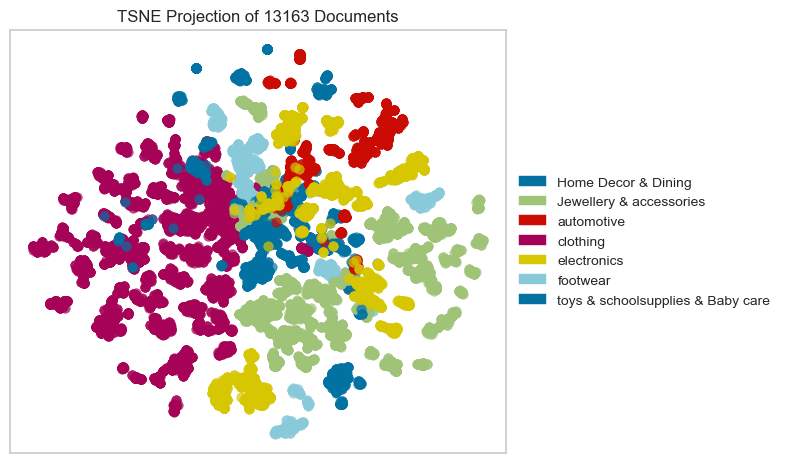

In [68]:
from yellowbrick.text import TSNEVisualizer

# creating the document vectors
tfidf = TfidfVectorizer()

description = tfidf.fit_transform(products["cleaned_desc"])
categories_ = products["primary_categories"]

# creating the visualizer
tsne = TSNEVisualizer()
tsne.fit_transform(description, categories_)
tsne.poof()
plt.show()

This preprocessed unbalanced dataset is then saved as a csv file for further training.

In [82]:
#saving the unbalanced dataframe into drive

unbalanced_df = products

## **Balancing out the Dataset**

From the above plotted bar graphs and the dataframe, we could see that the dataset is very imbalanced with more than half of the dataset residing in **clothing** and **jewellary** categories. 2 of the following dataset balancing techniques are adopted in order to ensure that there is an almost equal frequency of products for each major product category (in order to train an unbiased model and increase the accuracy).

* Oversampling
* Undersampling

### **1) Oversampling**

Random oversampling of the minority classes (i.e. classes apart from clothing and jewellary) is implemented below.  




In [142]:
# a copy of the unbalanced dataset is made on which further work is done
balanced_df = products.copy(deep=True)# for oversampling
balanced2_df = products.copy(deep=True)#for undersampling
balanced_df

,product_name,product_category_tree,description,brand,primary_categories,desc_pol,desc_len,cleaned_desc
0,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,0.143750,410,key feature alisha solid woman cycling short c...
1,AW Bellies,Footwear,Key Features of AW Bellies Sandals Wedges Heel...,AW,footwear,0.027778,650,key feature belly sandal wedge heel casualsaw ...
2,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,0.122917,403,key feature alisha solid woman cycling short c...
3,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,0.127778,416,key feature alisha solid woman cycling short c...
4,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,"Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,footwear,-0.032143,428,key feature dilli bazaaar belly corporate casu...
...,...,...,...,...,...,...,...,...
13158,Thelostpuppy Book Cover for Apple iPad Air 2,Mobiles & Accessories,Thelostpuppy Book Cover for Apple iPad Air 2 (...,Thelostpuppy,electronics,0.519048,641,thelostpuppy book cover apple ipad air multico...
13159,Babes Brass Cuff,Jewellery,Babes Brass Cuff (Pack of 2)\n ...,Babes,Jewellery & accessories,0.511429,694,babe brass cuff pack price babe brand present ...
13160,Kenway Retail Brass Copper Cuff,Jewellery,Kenway Retail Brass Copper Cuff\n ...,Kenway Retail,Jewellery & accessories,0.500000,669,kenway retail brass copper cuff price sultry s...
13161,Kenway Retail Brass Copper Cuff,Jewellery,Kenway Retail Brass Copper Cuff\n ...,Kenway Retail,Jewellery & accessories,0.083929,675,kenway retail brass copper cuff price hot swag...


This is done to help increase the accuracy of the model that will be trained further. Around 3000 samples for each category is considered in the final oversampled dataset.

In [143]:
from sklearn.utils import resample

#balanced_df = balanced_df.loc[balanced_df['main_category'] == 1]

final_balanced_df = {category: balanced_df[balanced_df['primary_categories']==category] for category in set(balanced_df['primary_categories'])}

train_df = pd.concat([resample(data, n_samples=3000, replace=True, random_state=42) for data in final_balanced_df.values()])
train_df

,product_name,product_category_tree,description,brand,primary_categories,desc_pol,desc_len,cleaned_desc
4617,Babeezworld Baby Boy's Romper,Baby Care,Specifications of Babeezworld Baby Boy's Rompe...,Babeezworld,toys & schoolsupplies & Baby care,0.180556,282,specification babeezworld baby boy romper top ...
7419,Babyoye Premium Baby Girl's Grey Leggings,Baby Care,Specifications of Babyoye Premium Baby Girl's ...,Babyoye Premium,toys & schoolsupplies & Baby care,0.100000,224,specification babyoye premium baby girl grey l...
5466,Outshiny Eagle Printed Art Polyester Pencil Box,Toys & School Supplies,Flipkart.com: Buy Outshiny Eagle Printed Art P...,NaN,toys & schoolsupplies & Baby care,0.225000,187,flipkartcom buy outshiny eagle printed art pol...
4629,Tucasa LG-110 Table Lamp,Pens & Stationery,Key Features of Tucasa LG-110 Table Lamp Red 1...,Tucasa,toys & schoolsupplies & Baby care,0.010000,494,key feature tucasa table lamp red bulbspecific...
2631,SHOPMANIA DESIGNER NOTEBOOK A5 Notebook Spiral...,Pens & Stationery,Specifications of SHOPMANIA DESIGNER NOTEBOOK ...,SHOPMANIA,toys & schoolsupplies & Baby care,0.038492,406,specification shopmania designer notebook note...
...,...,...,...,...,...,...,...,...
5981,"Smartpro 19.5v,3.9a Replacement Charger for Va...",Computers,"Key Features of Smartpro 19.5v,3.9a Replacemen...",Smartpro,electronics,0.034962,2296,key feature smartpro charger vaio series vgncr...
12126,BESTSUIT White Micro-Usb Type For INTEX USB Cable,Mobiles & Accessories,Key Features of BESTSUIT White Micro-Usb Type ...,BESTSUIT,electronics,0.120963,955,key feature bestsuit white microusb type intex...
11600,Perucci PC-3333Purple Analog Watch - For Women,Watches,Perucci PC-3333Purple Analog Watch - For Wome...,NaN,electronics,0.340000,270,perucci pcpurple analog watch woman buy perucc...
3935,Atc Fly 01,Mobiles & Accessories,Buy Atc Fly 01 for Rs.236 Online. Only Genuine...,Atc,electronics,0.425000,119,buy atc fly online product day guarantee shipp...


**Dataframe showing the count of the new oversampled datapoints**

In [144]:
train_df['primary_categories'].value_counts()

primary_categories
toys & schoolsupplies & Baby care    3000
footwear                             3000
Home Decor & Dining                  3000
Jewellery & accessories              3000
automotive                           3000
clothing                             3000
electronics                          3000
Name: count, dtype: int64

In [97]:
#saving the oversampling balanced dataframe into drive

oversampled_df = train_df

### **2) Undersampling**

Random undersampling of the majority classes (i.e. clothing and jewellary) is implemented below.  

In [145]:
balanced2_df

,product_name,product_category_tree,description,brand,primary_categories,desc_pol,desc_len,cleaned_desc
0,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,0.143750,410,key feature alisha solid woman cycling short c...
1,AW Bellies,Footwear,Key Features of AW Bellies Sandals Wedges Heel...,AW,footwear,0.027778,650,key feature belly sandal wedge heel casualsaw ...
2,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,0.122917,403,key feature alisha solid woman cycling short c...
3,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,0.127778,416,key feature alisha solid woman cycling short c...
4,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,"Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,footwear,-0.032143,428,key feature dilli bazaaar belly corporate casu...
...,...,...,...,...,...,...,...,...
13158,Thelostpuppy Book Cover for Apple iPad Air 2,Mobiles & Accessories,Thelostpuppy Book Cover for Apple iPad Air 2 (...,Thelostpuppy,electronics,0.519048,641,thelostpuppy book cover apple ipad air multico...
13159,Babes Brass Cuff,Jewellery,Babes Brass Cuff (Pack of 2)\n ...,Babes,Jewellery & accessories,0.511429,694,babe brass cuff pack price babe brand present ...
13160,Kenway Retail Brass Copper Cuff,Jewellery,Kenway Retail Brass Copper Cuff\n ...,Kenway Retail,Jewellery & accessories,0.500000,669,kenway retail brass copper cuff price sultry s...
13161,Kenway Retail Brass Copper Cuff,Jewellery,Kenway Retail Brass Copper Cuff\n ...,Kenway Retail,Jewellery & accessories,0.083929,675,kenway retail brass copper cuff price hot swag...


In [146]:
# the datapoints are separated out into jewellary, clothing and non jewellary and clothing entries

jewellary_df = balanced2_df.loc[balanced2_df['primary_categories'] == 'Jewellery & accessories']
clothing_df = balanced2_df.loc[balanced2_df['primary_categories'] == 'clothing']
not_jewellary_clothing = balanced2_df.loc[balanced2_df['primary_categories'] != 'clothing']
not_jewellary_clothing = not_jewellary_clothing.loc[not_jewellary_clothing['primary_categories'] != 'Jewellery & accessories']
print(jewellary_df.shape, clothing_df.shape, not_jewellary_clothing.shape)

(2810, 8) (4663, 8) (5690, 8)


Only the 8 major categories are considered. This is done to help increase the accuracy of the model that will be trained further. Around 1700 samples for clothing and jewellary categories are considered in the final undersampled dataset. This number is chosen by keeping the frequency of the other categories in mind while trying not to lose useful information during undersampling.

In [147]:
clothing_down = resample(clothing_df, replace = False, n_samples = 1700, random_state = 42)
jewellary_down = resample(jewellary_df, replace = False, n_samples = 1700, random_state = 42)

print(clothing_down.shape, jewellary_down.shape)

(1700, 8) (1700, 8)


In [148]:
undersampled_bal = pd.concat([clothing_down, jewellary_down, not_jewellary_clothing])
undersampled_bal = undersampled_bal.reset_index(drop=True)
undersampled_bal

,product_name,product_category_tree,description,brand,primary_categories,desc_pol,desc_len,cleaned_desc
0,I Am For You Women's Solid Casual Shirt,Clothing,I Am For You Women's Solid Casual Shirt - Buy ...,NaN,clothing,-0.095833,207,woman solid casual shirt buy black woman solid...
1,Addyvero Solid Women's Tunic,Clothing,Addyvero Solid Women's Tunic - Buy Pink Addyve...,NaN,clothing,0.050000,185,addyvero solid woman tunic buy pink addyvero s...
2,Care N Care Labela C Women's T-Shirt Bra,Clothing,Care N Care Labela C Women's T-Shirt Bra\n ...,Purple,clothing,-0.025000,156,care care labela woman tshirt bra price soothi...
3,Wrangler Regular Fit Men's Jeans,Clothing,Wrangler Regular Fit Men's Jeans\n ...,Regular,clothing,0.183673,1792,wrangler regular fit men jean price pair blue ...
4,Zet Zone Fashionable Women's Full Coverage Bra,Clothing,Zet Zone Fashionable Women's Full Coverage Bra...,White,clothing,0.183333,221,zet zone fashionable woman full coverage bra b...
...,...,...,...,...,...,...,...,...
9085,TheLostPuppy Back Cover for Apple iPad Air,Mobiles & Accessories,TheLostPuppy Back Cover for Apple iPad Air (Mu...,TheLostPuppy,electronics,0.444898,639,thelostpuppy back cover apple ipad air multico...
9086,Thelostpuppy Book Cover for Apple iPad Air 2,Mobiles & Accessories,Thelostpuppy Book Cover for Apple iPad Air 2 (...,Thelostpuppy,electronics,0.362202,642,thelostpuppy book cover apple ipad air grey bl...
9087,Thelostpuppy Book Cover for Apple iPad Air,Mobiles & Accessories,Thelostpuppy Book Cover for Apple iPad Air (Mu...,Thelostpuppy,electronics,0.519048,639,thelostpuppy book cover apple ipad air multico...
9088,Furry Printed Single Blanket Multicolor,Baby Care,Furry Printed Single Blanket Multicolor (2 Bla...,Furry,toys & schoolsupplies & Baby care,-0.173469,331,furry printed single blanket multicolor blanke...


**Dataframe showing the count of the new undersampled datapoints**

In [149]:
undersampled_bal['primary_categories'].value_counts()

primary_categories
electronics                          1877
clothing                             1700
Jewellery & accessories              1700
Home Decor & Dining                  1212
footwear                              988
automotive                            935
toys & schoolsupplies & Baby care     678
Name: count, dtype: int64


### **Machine Learning Models for Product Categorization**
The ML Models are trained for all the 3 datasets in the following order:

Imbalanced Dataset
Balanced Dataset (using Oversampling)
Balanced Dataset (using Undersampling)

Machine Learning Models Used:
Logistic Regression (Multiclass Variants)
Linear Support Vector Machine
Random Forest Classifier
K Nearest Neighbours

The following are the steps that are performed across all the functions:

    Splitting of the dataset randomly into training and test dataset with the help of train_test_split function
    Bag of Words model of the training dataset is created to represent the text data into numbers that can be  interpreted by the model
    Then these are converted to he corresponding TF-IDF vectors (as these perform better in terms of ML Models)
    Fitting the training dataset to the Machine Learning Model
    Predicting the Output for the testing Dataset
    Evaluation Metrics are printed to get an in depth idea about the accuracy of our model

In [150]:
def logistic_regression_multiclass(x,y):
  from sklearn.linear_model import LogisticRegression

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  reg = 0.1

  #fitting the training dataset to the multiclass classification Logistic Regression model
  lr_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=1000).fit(x_train,y_train)
  lr_predict = lr_model.predict(x_test)
  lr_pred_prob = lr_model.predict_proba(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",accuracy_score(y_test, lr_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT **************")
  print(classification_report(y_test,lr_predict))

  return y_test, lr_predict, lr_pred_prob

In [151]:
def linear_svm(x,y):
  from sklearn.svm import LinearSVC

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  #fitting the training dataset to the model
  svc_model = LinearSVC(random_state=42, max_iter=2000)
  svc_model.fit(x_train,y_train)
  svc_predict = svc_model.predict(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",accuracy_score(y_test, svc_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT **************")
  print(classification_report(y_test,svc_predict))

  return y_test, svc_predict

In [152]:
def random_forest(x, y):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, classification_report

    # Splitting the dataset into training and test parts
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Bag of Words implementation
    cv = CountVectorizer()
    x_train = cv.fit_transform(x_train).toarray()

    # TF-IDF implementation
    vector = TfidfTransformer()
    x_train = vector.fit_transform(x_train).toarray()
    x_test = cv.transform(x_test).toarray()  # Transform test data using the same vectorizer
    x_test = vector.transform(x_test).toarray()

    # Fitting the training dataset to the model
    rfc_model = RandomForestClassifier(random_state=42, max_depth=30)
    rfc_model.fit(x_train, y_train)

    # Predictions and Evaluation
    rfc_predict = rfc_model.predict(x_test)
    rfc_pred_prob = rfc_model.predict_proba(x_test)

    print("Validation Accuracy: ", accuracy_score(y_test, rfc_predict))
    print("\n***** CLASSIFICATION REPORT ******")
    print(classification_report(y_test, rfc_predict))

    # Return the model and vectorizers for reuse
    return rfc_model, cv, vector

In [153]:
def k_nearest_neighbours(x,y):
  from sklearn.neighbors import KNeighborsClassifier

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  #fitting the training dataset to the model
  knn_model = KNeighborsClassifier(algorithm='brute')
  knn_model.fit(x_train,y_train)
  knn_predict = knn_model.predict(x_test)
  knn_pred_prob = knn_model.predict_proba(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",accuracy_score(y_test, knn_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT **************")
  print(classification_report(y_test, knn_predict))

  return y_test, knn_predict, knn_pred_prob

## **Evaluation of the ML Model on unbalanced dataset**

In [154]:
# the cleaned product description corresponds to the x value 
x = unbalanced_df['cleaned_desc']
# the 13 labels/ product categories mentioned above correspond to the y value
y = unbalanced_df['primary_categories']

In [155]:
print("********** LOGISTIC REGRESSION **********")
y_test, lr_predict, lr_pred_prob = logistic_regression_multiclass(x,y)

********** LOGISTIC REGRESSION **********
Validation Accuracy:  0.9821496391948348


*********** CLASSIFICATION REPORT **************
                                   precision    recall  f1-score   support

              Home Decor & Dining       0.97      0.97      0.97       252
          Jewellery & accessories       0.99      0.98      0.99       590
                       automotive       0.96      1.00      0.98       199
                         clothing       0.99      0.99      0.99       911
                      electronics       0.98      0.99      0.98       361
                         footwear       0.97      0.98      0.97       179
toys & schoolsupplies & Baby care       0.95      0.91      0.93       141

                         accuracy                           0.98      2633
                        macro avg       0.97      0.97      0.97      2633
                     weighted avg       0.98      0.98      0.98      2633



In [156]:
print("********* LINEAR SVM *********")
y_test, svm_predict = linear_svm(x,y)

********* LINEAR SVM *********
Validation Accuracy:  0.9863273832130649


*********** CLASSIFICATION REPORT **************
                                   precision    recall  f1-score   support

              Home Decor & Dining       0.97      0.98      0.98       252
          Jewellery & accessories       0.99      0.99      0.99       590
                       automotive       0.97      0.99      0.98       199
                         clothing       0.99      0.99      0.99       911
                      electronics       0.99      0.99      0.99       361
                         footwear       0.99      0.98      0.99       179
toys & schoolsupplies & Baby care       0.96      0.91      0.93       141

                         accuracy                           0.99      2633
                        macro avg       0.98      0.98      0.98      2633
                     weighted avg       0.99      0.99      0.99      2633



In [157]:
print("********** RANDOM FOREST CLASSIFIER *************")
y_test, rfc_predict, rfc_pred_prob = random_forest(x,y)

********** RANDOM FOREST CLASSIFIER *************
Validation Accuracy:  0.9380934295480441

***** CLASSIFICATION REPORT ******
                                   precision    recall  f1-score   support

              Home Decor & Dining       0.90      0.96      0.93       252
          Jewellery & accessories       0.89      0.98      0.94       590
                       automotive       1.00      0.96      0.98       199
                         clothing       0.94      1.00      0.97       911
                      electronics       0.97      0.95      0.96       361
                         footwear       1.00      0.72      0.83       179
toys & schoolsupplies & Baby care       0.99      0.57      0.73       141

                         accuracy                           0.94      2633
                        macro avg       0.96      0.88      0.90      2633
                     weighted avg       0.94      0.94      0.93      2633



In [158]:
print("********** K NEAREST NEIGHBOURS *************")
y_test, knn_predict, knn_pred_prob = k_nearest_neighbours(x,y)

********** K NEAREST NEIGHBOURS *************
Validation Accuracy:  0.9650588682111659


*********** CLASSIFICATION REPORT **************
                                   precision    recall  f1-score   support

              Home Decor & Dining       0.98      0.95      0.96       252
          Jewellery & accessories       0.96      0.98      0.97       590
                       automotive       0.98      0.97      0.97       199
                         clothing       0.98      0.99      0.98       911
                      electronics       0.98      0.94      0.96       361
                         footwear       0.86      0.99      0.92       179
toys & schoolsupplies & Baby care       0.92      0.81      0.86       141

                         accuracy                           0.97      2633
                        macro avg       0.95      0.95      0.95      2633
                     weighted avg       0.97      0.97      0.96      2633



## **Evaluation of the ML Model on oversampled and undersampled dataset**

In [ ]:
# the cleaned product description corresponds to the x value 
x = oversampled_df['cleaned_desc']
# the 13 labels/ product categories mentioned above correspond to the y value
y = oversampled_df['primary_categories']

In [159]:
print("********** RANDOM FOREST CLASSIFIER *************")
y_test, rfc_predict, rfc_pred_prob = random_forest(x,y)

********** RANDOM FOREST CLASSIFIER *************
Validation Accuracy:  0.9380934295480441

***** CLASSIFICATION REPORT ******
                                   precision    recall  f1-score   support

              Home Decor & Dining       0.90      0.96      0.93       252
          Jewellery & accessories       0.89      0.98      0.94       590
                       automotive       1.00      0.96      0.98       199
                         clothing       0.94      1.00      0.97       911
                      electronics       0.97      0.95      0.96       361
                         footwear       1.00      0.72      0.83       179
toys & schoolsupplies & Baby care       0.99      0.57      0.73       141

                         accuracy                           0.94      2633
                        macro avg       0.96      0.88      0.90      2633
                     weighted avg       0.94      0.94      0.93      2633



In [160]:
print("********* LINEAR SVM *********")
y_test, svm_predict = linear_svm(x,y)

********* LINEAR SVM *********
Validation Accuracy:  0.9863273832130649


*********** CLASSIFICATION REPORT **************
                                   precision    recall  f1-score   support

              Home Decor & Dining       0.97      0.98      0.98       252
          Jewellery & accessories       0.99      0.99      0.99       590
                       automotive       0.97      0.99      0.98       199
                         clothing       0.99      0.99      0.99       911
                      electronics       0.99      0.99      0.99       361
                         footwear       0.99      0.98      0.99       179
toys & schoolsupplies & Baby care       0.96      0.91      0.93       141

                         accuracy                           0.99      2633
                        macro avg       0.98      0.98      0.98      2633
                     weighted avg       0.99      0.99      0.99      2633



In [99]:
# the cleaned product description corresponds to the x value 
x = undersampled_bal['cleaned_desc']
# the 13 labels/ product categories mentioned above correspond to the y value
y = undersampled_bal['primary_categories']

In [161]:
print("********** RANDOM FOREST CLASSIFIER *************")
y_test, rfc_predict, rfc_pred_prob = random_forest(x,y)

********** RANDOM FOREST CLASSIFIER *************
Validation Accuracy:  0.9380934295480441

***** CLASSIFICATION REPORT ******
                                   precision    recall  f1-score   support

              Home Decor & Dining       0.90      0.96      0.93       252
          Jewellery & accessories       0.89      0.98      0.94       590
                       automotive       1.00      0.96      0.98       199
                         clothing       0.94      1.00      0.97       911
                      electronics       0.97      0.95      0.96       361
                         footwear       1.00      0.72      0.83       179
toys & schoolsupplies & Baby care       0.99      0.57      0.73       141

                         accuracy                           0.94      2633
                        macro avg       0.96      0.88      0.90      2633
                     weighted avg       0.94      0.94      0.93      2633



In [162]:
print("********* LINEAR SVM *********")
y_test, svm_predict = linear_svm(x,y)

********* LINEAR SVM *********
Validation Accuracy:  0.9863273832130649


*********** CLASSIFICATION REPORT **************
                                   precision    recall  f1-score   support

              Home Decor & Dining       0.97      0.98      0.98       252
          Jewellery & accessories       0.99      0.99      0.99       590
                       automotive       0.97      0.99      0.98       199
                         clothing       0.99      0.99      0.99       911
                      electronics       0.99      0.99      0.99       361
                         footwear       0.99      0.98      0.99       179
toys & schoolsupplies & Baby care       0.96      0.91      0.93       141

                         accuracy                           0.99      2633
                        macro avg       0.98      0.98      0.98      2633
                     weighted avg       0.99      0.99      0.99      2633



## ** LINEAR SVM performs best on all three datasets **

## ** Deep Learning Models for Product Categorization **

In [102]:
import keras

from tensorflow.keras.preprocessing.text import Tokenizer

from keras.models import Sequential

from keras.layers import Dense

from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten,Conv1D, MaxPooling1D

from keras.models import Model

from tensorflow.keras.utils import to_categorical

from keras.callbacks import ModelCheckpoint

from keras import layers

## Feature Engineering

To build the text classification model, we need to first convert the text data into features.

We use deep learning algorithms to build the classifier, and feature extraction should be carried out accordingly. We use the Keras tokenizer function to generate features. We are setting max_length to 200, which means we are only considering 200 features for the classifier. This number also decides the accuracy, and the ideal number can be obtained from hyperparameter tuning.

In [104]:
MAX_LENGTH= 200

prod_tok = Tokenizer()

prod_tok.fit_on_texts (unbalanced_df['cleaned_desc'])

clean_description = prod_tok.texts_to_sequences (unbalanced_df['cleaned_desc'])

#padding

X = pad_sequences(clean_description, maxlen = MAX_LENGTH)


In [105]:
# Label encoder for Target variable

from sklearn.preprocessing import LabelEncoder

num_class = len (np.unique (unbalanced_df.primary_categories.values))

y = unbalanced_df['primary_categories'].values

encoder = LabelEncoder()

encoder.fit(y)

y = encoder.transform(y)


In [106]:
#train test split

from sklearn.model_selection import train_test_split

indepentent_features_build, indepentent_features_valid, depentent_feature_build, depentent_feature_valid = train_test_split(X, y, test_size=0.2, random_state=1) #train 80, test 20
print (indepentent_features_build.shape)
print(indepentent_features_valid.shape)
print(depentent_feature_build.shape)
print(depentent_feature_valid.shape)

(10530, 200)
(2633, 200)
(10530,)
(2633,)


## Long Short-Term Memory: Recurrent Neural Networks

We tried out normal neural networks which don't capture the sequence of the data. Let's try a long short-term memory network where the sequence is also captured while training the model. This is best suited for text since text data is sequential.

The following is the architecture for the neural network. The input neurons are the max_length we defined earlier. An LSTM layer follows an embedding layer. In the end, there is a softmax layer with 14 neurons. We are using a rmsprop optimizer with categorical cross-entropy as a loss function.

In [108]:
model_inp  = Input (shape=(MAX_LENGTH, ))

vocab_size = len(prod_tok.word_index) + 1  # Adding 1 for the unknown token (index 0)

#define embedding layer

object_layer = Embedding (vocab_size, 100, input_length=MAX_LENGTH) (model_inp)

#add LSTM layer

a = LSTM(60) (object_layer)

#add dense layer

a = Dense (30)(a) #default activation function is linear, we can make use of relu.

#final

model_pred = Dense (num_class, activation='softmax')(a)

output = Model(inputs = [model_inp], outputs=model_pred)

#compile

output.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

output.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 200, 100)       │     1,669,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 60)             │        38,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           217 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,709,787 (6.52 MB)

 Trainable params: 1,709,787 (6.52 MB)

 Non-trainable params: 0 (0.00 B)

In [110]:
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import accuracy_score

filepath="output_LSTM.keras"

#model checkpoint

X = ModelCheckpoint (filepath, monitor = 'val_acc', verbose=1, save_best_only=True, mode='max')

#fitting

out = output.fit([indepentent_features_build], batch_size=64, y=to_categorical(depentent_feature_build), verbose=1, validation_split=0.25, shuffle=True, epochs=8, callbacks=[X])

output.load_weights ('output_LSTM.keras')

#predicting on validation data

output_pred = output.predict(indepentent_features_valid)

output_pred = np.argmax (output_pred, axis=1)

#score

accuracy_score (depentent_feature_valid, output_pred)

Epoch 1/8
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - acc: 0.8818 - loss: 0.3368
Epoch 1: val_acc improved from -inf to 0.96126, saving model to output_LSTM.keras
124/124 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - acc: 0.8821 - loss: 0.3362 - val_acc: 0.9613 - val_loss: 0.1607
Epoch 2/8
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - acc: 0.9680 - loss: 0.1132
Epoch 2: val_acc improved from 0.96126 to 0.96658, saving model to output_LSTM.keras
124/124 ━━━━━━━━━━━━━━━━━━━━ 12s 101ms/step - acc: 0.9681 - loss: 0.1131 - val_acc: 0.9666 - val_loss: 0.1340
Epoch 3/8
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - acc: 0.9857 - loss: 0.0552
Epoch 3: val_acc improved from 0.96658 to 0.97607, saving model to output_LSTM.keras
124/124 ━━━━━━━━━━━━━━━━━━━━ 14s 110ms/step - acc: 0.9857 - loss: 0.0552 - val_acc: 0.9761 - val_loss: 0.0975
Epoch 4/8
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - acc: 0.9935 - loss: 0.0263
Epoch 4: val_acc did not improve from 0.97607
124/124 ━━━━━━━━━━━━━━━━━━━━ 15s 117ms/step - ac

0.9737941511583745

Text(0, 0.5, 'Validation Accuracy')

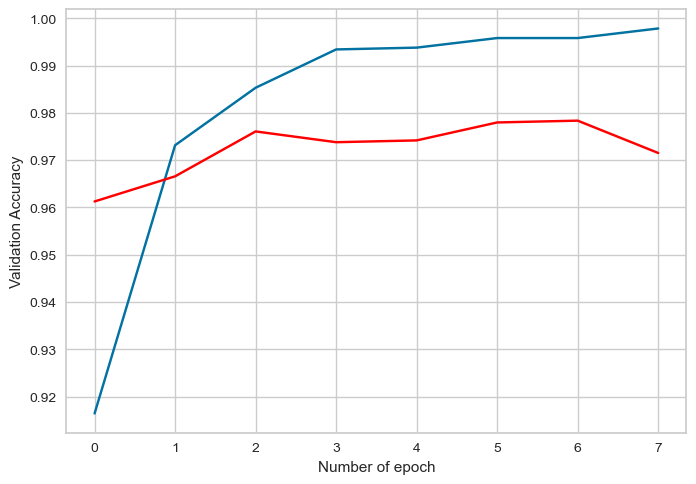

In [111]:
dfaccuracy = pd.DataFrame({'Number of epoch': out.epoch, 'Model hist': out.history['acc'], 'Model Perd': out.history['val_acc']})

# Line for train accuracy
g = sns.lineplot(x="Number of epoch", y="Model hist", data=dfaccuracy)

# Line for test accuracy
g = sns.lineplot(x="Number of epoch", y="Model Perd", data=dfaccuracy, color='red')

# Set y-axis label
g.set_ylabel('Validation Accuracy')

## Prediction on the unseen test data

In [113]:
test_df = pd.read_csv('test_data.csv')
test_df.head()

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,4fb99d98225f415e7ece96938e95628f,2015-12-20 08:26:17 +0000,http://www.flipkart.com/v-v-art-brass-bracelet...,V&V ART Brass Bracelet,BBAE6NYHCDTEZJTB,470.0,423.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,No rating available,No rating available,V&V ART,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,4ea284c8d38b2ea97a1c2a26f34e057c,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kalpaveda-copper-cuff/...,Kalpaveda Copper Copper Cuff,BBAEDFFKZJTY7SZZ,1200.0,1200.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Kalpaveda Copper Copper Cuff\n ...,No rating available,No rating available,Kalpaveda,"{""product_specification""=>[{""key""=>""Stretchabl..."
2,ee6ce2c7045c54257e2a0b590e09c296,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-book-cove...,Thelostpuppy Book Cover for Apple iPad Air,ACCEA4DZH6M5SFVH,2199.0,599.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,Thelostpuppy Book Cover for Apple iPad Air (Mu...,No rating available,No rating available,Thelostpuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
3,e797ba3b5f2e2d1fdc520e48486ab60e,2015-12-20 08:26:17 +0000,http://www.flipkart.com/riana-copper-bangle/p/...,Riana Copper Copper Bangle,BBAEAXFQHHMF3EYZ,2499.0,649.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Riana Copper Copper Bangle - Buy Riana Copper ...,5,5,Riana,"{""product_specification""=>[{""key""=>""Collection..."
4,f4d8d43858c8858c68d75ce07ac641c0,2015-12-20 08:26:17 +0000,http://www.flipkart.com/inox-jewelry-stainless...,Inox Jewelry Stainless Steel Cuff,BBAECH63WYDG6TE2,1629.0,1222.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Inox Jewelry Stainless Steel Cuff\n ...,No rating available,No rating available,Inox Jewelry,"{""product_specification""=>[{""key""=>""Stretchabl..."


In [118]:
# Assuming df contains the training dataset
# the cleaned product description corresponds to the x value 
X = oversampled_df['cleaned_desc']
# the 13 labels/ product categories mentioned above correspond to the y value
y = oversampled_df['primary_categories']

# Train the model and get vectorizers
rfc_model, count_vectorizer, tfidf_transformer = random_forest(X, y)

Validation Accuracy:  0.9873809523809524

***** CLASSIFICATION REPORT ******
                                   precision    recall  f1-score   support

              Home Decor & Dining       0.96      1.00      0.98       621
          Jewellery & accessories       1.00      0.98      0.99       580
                       automotive       1.00      0.99      0.99       625
                         clothing       1.00      0.99      0.99       608
                      electronics       0.99      0.98      0.98       573
                         footwear       0.98      1.00      0.99       627
toys & schoolsupplies & Baby care       0.98      0.98      0.98       566

                         accuracy                           0.99      4200
                        macro avg       0.99      0.99      0.99      4200
                     weighted avg       0.99      0.99      0.99      4200



In [119]:
# Load unseen dataset
unseen_df = pd.read_csv('test_data.csv')  # Replace with actual unseen dataset file

# Preprocess unseen descriptions (same as training preprocessing)
unseen_df['description'] = unseen_df['description'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

# Transform unseen data using the same vectorizers
X_unseen_counts = count_vectorizer.transform(unseen_df['description']).toarray()
X_unseen_tfidf = tfidf_transformer.transform(X_unseen_counts).toarray()

# Predict categories for unseen data
unseen_predictions = rfc_model.predict(X_unseen_tfidf)

# Map predictions back to original labels (if encoded earlier)
unseen_df['predicted_category'] = unseen_predictions



In [120]:
unseen_df.head()

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,predicted_category
0,4fb99d98225f415e7ece96938e95628f,2015-12-20 08:26:17 +0000,http://www.flipkart.com/v-v-art-brass-bracelet...,V&V ART Brass Bracelet,BBAE6NYHCDTEZJTB,470.0,423.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,vv art brass bracelet buy vv art brass bracel...,No rating available,No rating available,V&V ART,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Jewellery & accessories
1,4ea284c8d38b2ea97a1c2a26f34e057c,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kalpaveda-copper-cuff/...,Kalpaveda Copper Copper Cuff,BBAEDFFKZJTY7SZZ,1200.0,1200.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,kalpaveda copper copper cuff\n ...,No rating available,No rating available,Kalpaveda,"{""product_specification""=>[{""key""=>""Stretchabl...",Jewellery & accessories
2,ee6ce2c7045c54257e2a0b590e09c296,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-book-cove...,Thelostpuppy Book Cover for Apple iPad Air,ACCEA4DZH6M5SFVH,2199.0,599.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,thelostpuppy book cover for apple ipad air mul...,No rating available,No rating available,Thelostpuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v...",electronics
3,e797ba3b5f2e2d1fdc520e48486ab60e,2015-12-20 08:26:17 +0000,http://www.flipkart.com/riana-copper-bangle/p/...,Riana Copper Copper Bangle,BBAEAXFQHHMF3EYZ,2499.0,649.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,riana copper copper bangle buy riana copper c...,5,5,Riana,"{""product_specification""=>[{""key""=>""Collection...",Jewellery & accessories
4,f4d8d43858c8858c68d75ce07ac641c0,2015-12-20 08:26:17 +0000,http://www.flipkart.com/inox-jewelry-stainless...,Inox Jewelry Stainless Steel Cuff,BBAECH63WYDG6TE2,1629.0,1222.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,inox jewelry stainless steel cuff\n ...,No rating available,No rating available,Inox Jewelry,"{""product_specification""=>[{""key""=>""Stretchabl...",Jewellery & accessories


In [121]:
unseen_df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'pid',
       'retail_price', 'discounted_price', 'image', 'is_FK_Advantage_product',
       'description', 'product_rating', 'overall_rating', 'brand',
       'product_specifications', 'predicted_category'],
      dtype='object')

In [124]:
df_test = unseen_df
df_test.drop(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'pid'
              ,'retail_price', 'discounted_price', 'image', 'is_FK_Advantage_product','product_rating', 
              'overall_rating', 'brand','product_specifications'], axis = 1)

,description,predicted_category
0,vv art brass bracelet buy vv art brass bracel...,Jewellery & accessories
1,kalpaveda copper copper cuff\n ...,Jewellery & accessories
2,thelostpuppy book cover for apple ipad air mul...,electronics
3,riana copper copper bangle buy riana copper c...,Jewellery & accessories
4,inox jewelry stainless steel cuff\n ...,Jewellery & accessories
...,...,...
2529,buy walldesign small vinyl sticker for rs730 o...,Home Decor & Dining
2530,buy wallmantra large vinyl stickers sticker fo...,Home Decor & Dining
2531,buy elite collection medium acrylic sticker fo...,Home Decor & Dining
2532,buy elite collection medium acrylic sticker fo...,Home Decor & Dining


In [136]:
#saving the unbalanced dataframe into drive

with open('test_data.csv', 'w') as f:
  unseen_df.to_csv(f)
     